In [ ]:
# https://www.kaggle.com/c/facial-keypoints-detection/data

In [1]:
import json

In [2]:
with open("/content/drive/MyDrive/facial_detection/ffhq-dataset-v2.json",'r') as file:
  data = json.load(file)

In [3]:
len(list(data.keys()))

70000

[[371.32, 144.47], [435.39, 1410.96], [1701.88, 1346.88], [1637.81, 80.39]]
371 1410 1701 80
(1330, 1330, 3)


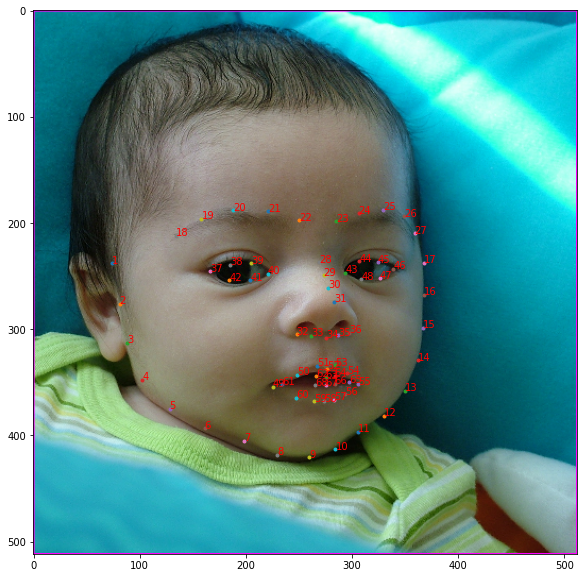

In [4]:
from google.colab.patches import cv2_imshow
import urllib.request as url
import cv2
import matplotlib.pyplot as plt
import numpy as np

def update_coordinate(point,image,new_dim):
  return [(point[0]/image.shape[1])*new_dim,(point[1]/image.shape[0])*new_dim]

def plot_rectangle(bbox,image):
  x,y,w,h = bbox
  cv2.rectangle(image,(x,y),(w,h),(255,0,0),2)
  return image

def plot_landmarks(landmarks,image):
  markers = list(map(str,range(1,len(landmarks)+1)))
  for index,i in enumerate(landmarks):
    # print(m)
    plt.plot(*i,marker=".")

    plt.text(*i,markers[index],color="red")
    # break

sample = 0
sample = data[f'{sample}']['in_the_wild']
path = "/".join(sample['file_path'].split("/")[1:])

image = cv2.imread(f"/content/drive/MyDrive/in-the-wild-images/{path}")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
rects = sample['face_rect']

rects = [*update_coordinate(rects[:2],image,512),*update_coordinate(rects[2:],image,512)] 
rects = [int(i) for i in rects]
landmarks = []

quads = sample['face_quad']
print(quads)

plt.figure(figsize=(10,10))

x,y = [],[]
for i in quads:
  x.append(int(i[0]))
  y.append(int(i[1]))

x,y,w,h = [min(x),max(y),max(x),min(y)]
y = max(0,y)
w = max(0,w)
x = max(0,x)
h = max(0,h)
print(x,y,w,h)

cv2.rectangle(image,(x,y),(w,h),(255,0,255),5)
plt.plot()

crop_image = image[h:y, x:w]
print(crop_image.shape)

for i in sample['face_landmarks']:
  m = [i[0] - x,i[1] - h]
  m = update_coordinate(m,crop_image,512)
  landmarks.append(m)

crop_image = cv2.resize(crop_image,(512,512))
plot_landmarks(landmarks,crop_image)

plt.imshow(crop_image)

# plt.imshow(image)
plt.show()

In [5]:
# !rm -rf in-the-wild-images/
# !mkdir /content/in-the-wild-images/

In [6]:
x,y

(371, 1410)

In [7]:
!rm -rf images

In [8]:
from tqdm.notebook import tqdm
!mkdir images
all_data={}

def work(k):
  path,sample,sample_num = k
  image = cv2.imread(path)
  quads = sample['face_quad']

  x,y = [],[]
  for i in quads:
    x.append(int(i[0]))
    y.append(int(i[1]))

  x,y,w,h = [min(x),max(y),max(x),min(y)]
  y = max(1,y)
  w = max(1,w)
  x = max(1,x)
  h = max(1,h)

  landmarks=[]
  crop_image = image[h:y, x:w]

  for i in sample['face_landmarks']:
    m = [i[0] - x,i[1] - h]
    m = update_coordinate(m,crop_image,512)
    landmarks.append(m)
  
  crop_image = cv2.resize(crop_image,(512,512))
  cv2.imwrite(f"images/{sample['file_path'].split('/')[-1]}",crop_image)
  
  all_data[str(sample_num)] = {"file_name":sample['file_path'].split('/')[-1],
                               'face_landmarks':landmarks,}

paths = []
for sample_num in tqdm(range(5000)):
  sample = data[f'{sample_num}']['in_the_wild']
  path = "/".join(sample['file_path'].split("/")[1:])
  path = f'drive/MyDrive/in-the-wild-images/{path}'
  paths.append((path,sample,sample_num))

import multiprocessing
from multiprocessing.pool import ThreadPool

pool = ThreadPool(multiprocessing.cpu_count())
list(tqdm(pool.imap(work,paths),total=len(paths)))
pool.close()
pool.join()
  # break

In [13]:
with open("all_data.json",'w') as f:
  json.dump(all_data,f)

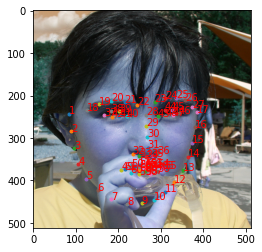

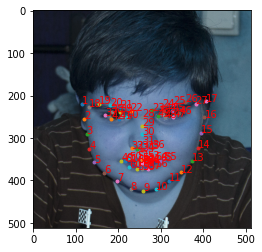

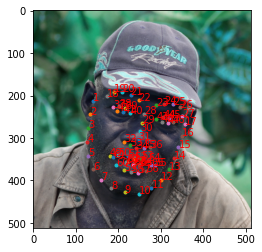

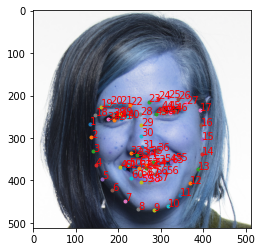

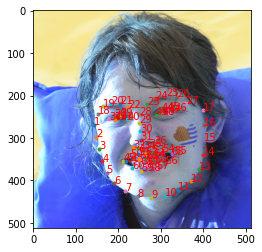

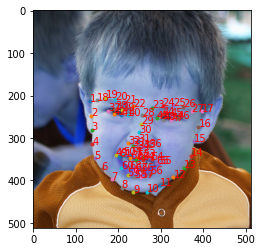

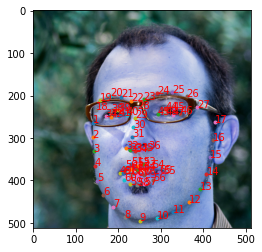

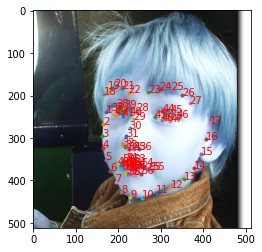

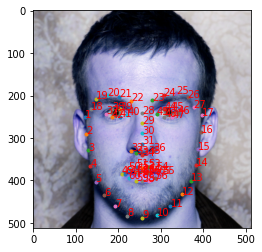

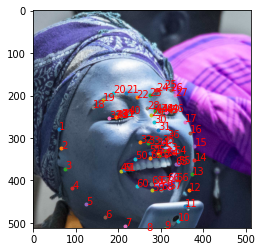

In [10]:
import random
for sample in random.sample(range(5000),10):
  sample_data = all_data[str(sample)]
  image = cv2.imread("images/"+sample_data['file_name'])
  plot_landmarks(sample_data['face_landmarks'],image)

  from google.colab.patches import cv2_imshow

  plt.imshow(image)
  plt.show()

In [14]:
# all_data
with open("all_data.json","r") as file:
  d = json.load(file)

In [15]:
len(d.keys())

5000

In [16]:
import os
len(os.listdir("images"))

5000

In [17]:
!mkdir new_data

In [ ]:
!zip -r /content/new_data/data.zip images/* all_data.json

In [19]:
!mkdir ~/.kaggle/
!cp /content/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [20]:
!kaggle datasets init -p /content/new_data

Data package template written to: /content/new_data/dataset-metadata.json


In [ ]:
%%bash
# mkdir new_data
# cd dataset
# zip -r /content/new_data/data.zip images data.json
# cp /content/dataset/dataset-metadata.json /content/new_data/dataset-metadata.json 

In [21]:
!kaggle datasets version -p /content/new_data/ -m "corrected first 5000 files"

Starting upload for file data.zip
100% 2.14G/2.14G [01:18<00:00, 29.1MB/s]
Upload successful: data.zip (2GB)
Dataset version is being created. Please check progress at https://www.kaggle.com/prashantarorat/facial-key-point-data
